In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from atm_transport import energy_flux

In [5]:
ctl_300 = xr.open_dataset('./../data_isca/t42_300_ga7_alb0.3_clim.nc')
ctl_1200 = xr.open_dataset('./../data_isca/t42_1200_ga7_alb0.3_clim.nc')
ctl_4800 = xr.open_dataset('./../data_isca/t42_4800_ga7_alb0.3_clim.nc')
diff_1200 = ctl_1200 - ctl_300
diff_4800 = ctl_4800 - ctl_1200

In [6]:
land=ctl_300.ml_heat_cap < 8257740
ocean=ctl_300.ml_heat_cap > 8257740
weights = np.cos(np.deg2rad(ctl_300.lat))
weights.name = "weights"

In [298]:
xar_obj = ctl_300
del_sol         = 1.0
start_xtropics  = 25.0
deg             = np.pi/180
l_cond          = 2500000
radius          = 6371000
grav            = 9.8000
cp              = 1.00464e+03
p0              = 100000

temp_flux = xar_obj.vcomp_temp.where(np.abs(xar_obj.vcomp_temp)<1e15).mean(('months','lon'))
temp_flux = temp_flux.where(temp_flux.pfull<950)
z_flux = xar_obj.vcomp_height.where(np.abs(xar_obj.vcomp_height)<1e15).mean(('months','lon'))
z_flux = z_flux.where(z_flux.pfull<950)
sh_flux = xar_obj.sphum_v.where(np.abs(xar_obj.sphum_v)<1e15).mean(('months','lon'))

energy_flux =  cp*temp_flux  + l_cond*sh_flux+ grav*z_flux
dry_energy_flux =  cp*temp_flux+ grav*z_flux
hum_energy_flux =  l_cond*sh_flux

energy_flux = energy_flux*-xar_obj.pfull.diff('pfull')
energy_flux = energy_flux.sum('pfull')*2*np.pi*radius*np.cos(xar_obj.lat*deg)/grav*100/1e15
dry_energy_flux = dry_energy_flux*-xar_obj.pfull.diff('pfull')
dry_energy_flux = dry_energy_flux.sum('pfull')*2*np.pi*radius*np.cos(xar_obj.lat*deg)/grav*100/1e15
hum_energy_flux = hum_energy_flux*-xar_obj.pfull.diff('pfull')
hum_energy_flux = hum_energy_flux.sum('pfull')*2*np.pi*radius*np.cos(xar_obj.lat*deg)/grav*100/1e15

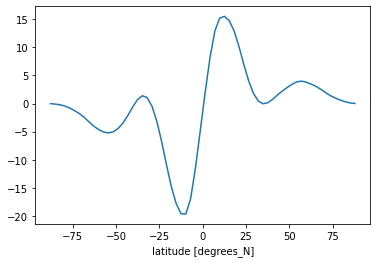

In [299]:
energy_flux.plot()

In [7]:
# get code for atmospheric heat transport

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


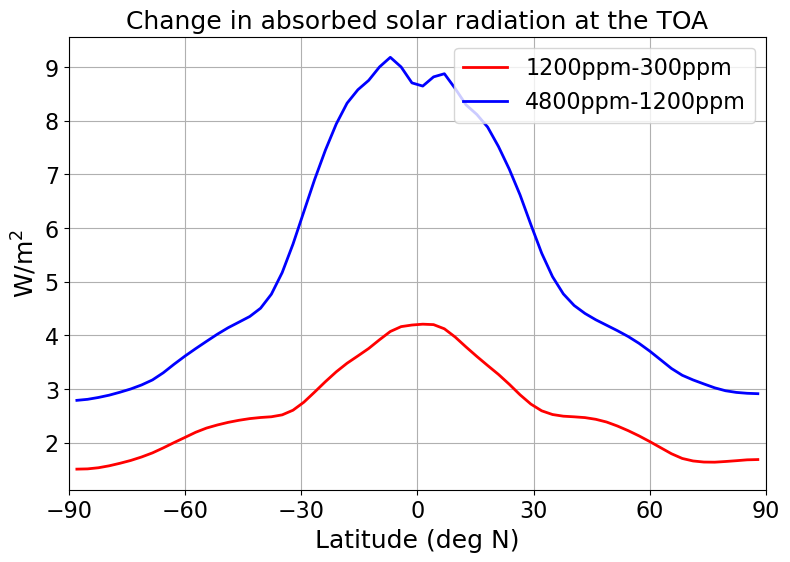

In [8]:
plt.figure(figsize=(9, 6),dpi=100)
diff_1200.soc_toa_sw.mean(('lon','months')).plot(lw=2,c='r',label='1200ppm-300ppm')
diff_4800.soc_toa_sw.mean(('lon','months')).plot(lw=2,c='b',label='4800ppm-1200ppm')
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('Change in absorbed solar radiation at the TOA',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()
plt.savefig('fig2.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


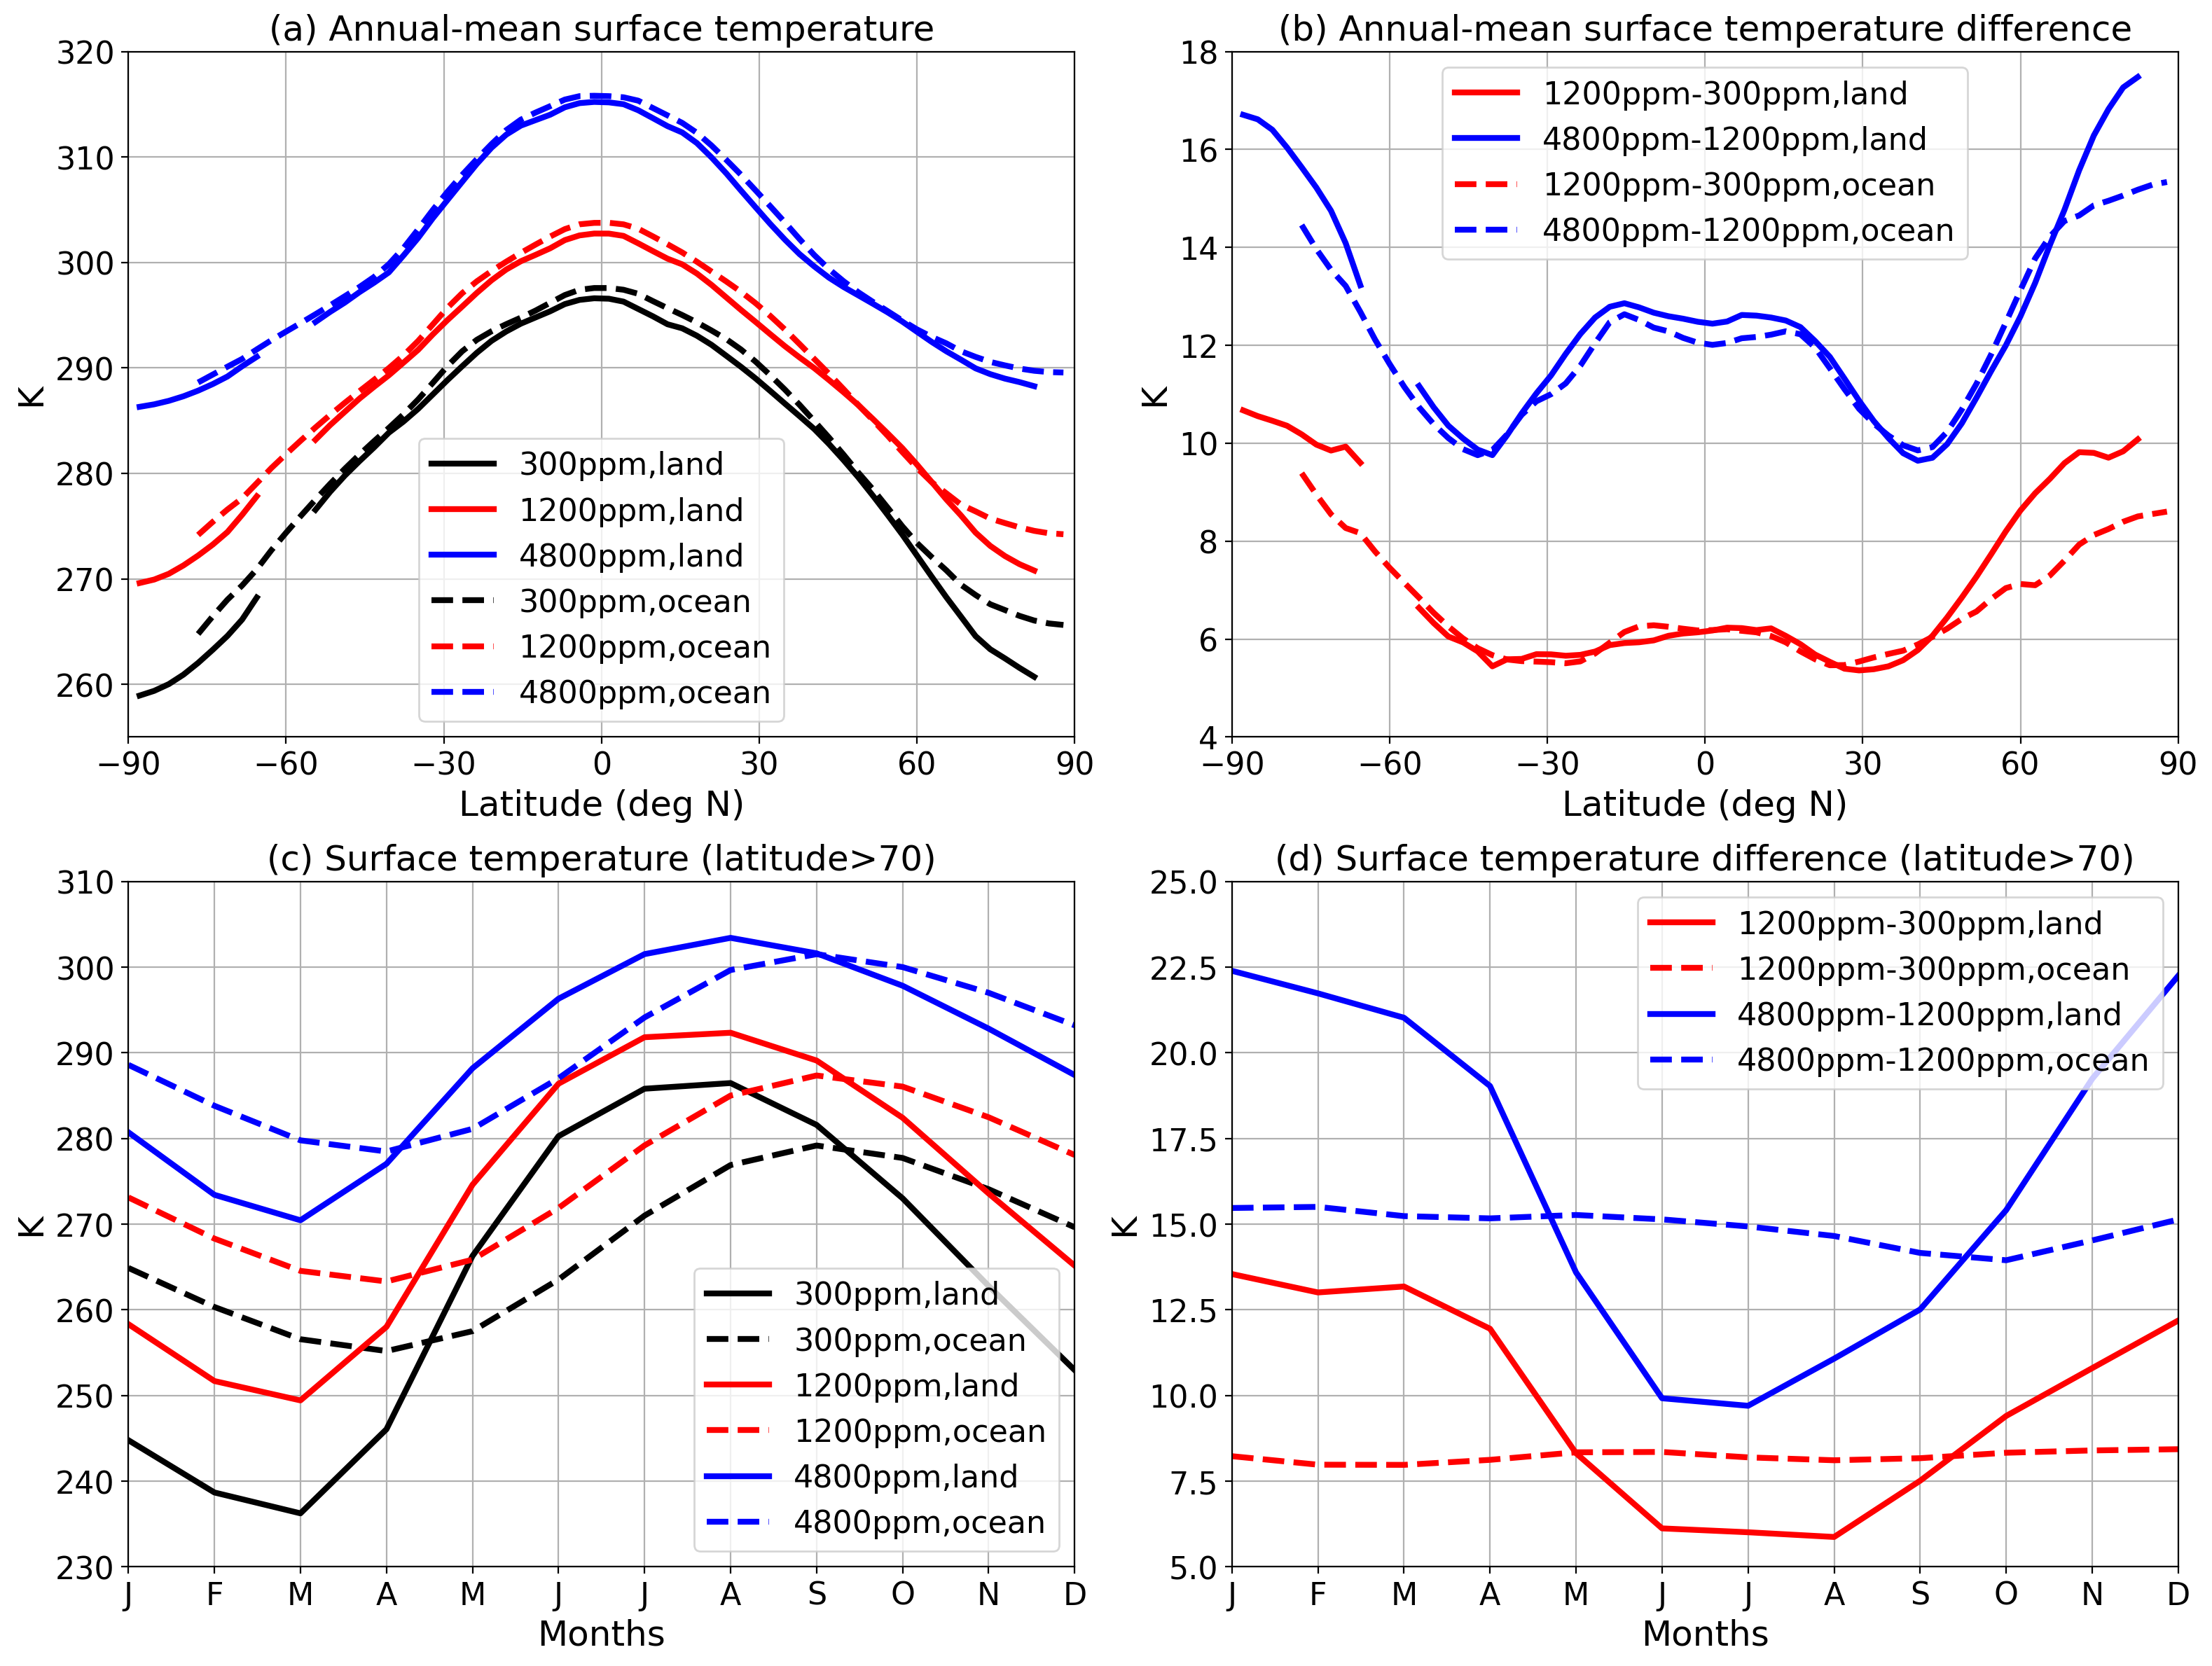

In [9]:
plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
ctl_300.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='k',label='300ppm,land')
ctl_1200.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='r',label='1200ppm,land')
ctl_4800.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='b',label='4800ppm,land')
ctl_300.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='k',label='300ppm,ocean')
ctl_1200.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='r',label='1200ppm,ocean')
ctl_4800.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='b',label='4800ppm,ocean')
plt.xlim([-90,90])
plt.ylim([255,320])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(a) Annual-mean surface temperature',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(222)
diff_1200.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='r',label='1200ppm-300ppm,land')
diff_4800.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='b',label='4800ppm-1200ppm,land')
diff_1200.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='r',label='1200ppm-300ppm,ocean')
diff_4800.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='b',label='4800ppm-1200ppm,ocean')
plt.xlim([-90,90])
plt.ylim([4,18])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(b) Annual-mean surface temperature difference',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(223)
ctl_300.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',label='300ppm,land')
ctl_300.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',ls='--',label='300ppm,ocean')
ctl_1200.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='1200ppm,land')
ctl_1200.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='1200ppm,ocean')
ctl_4800.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='4800ppm,land')
ctl_4800.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='4800ppm,ocean')
plt.xlim([1,12])
plt.ylim([230,310])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(c) Surface temperature (latitude>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(224)
diff_1200.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='1200ppm-300ppm,land')
diff_1200.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='1200ppm-300ppm,ocean')
diff_4800.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='4800ppm-1200ppm,land')
diff_4800.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='4800ppm-1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([5,25])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(d) Surface temperature difference (latitude>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('fig3.eps')
plt.show()

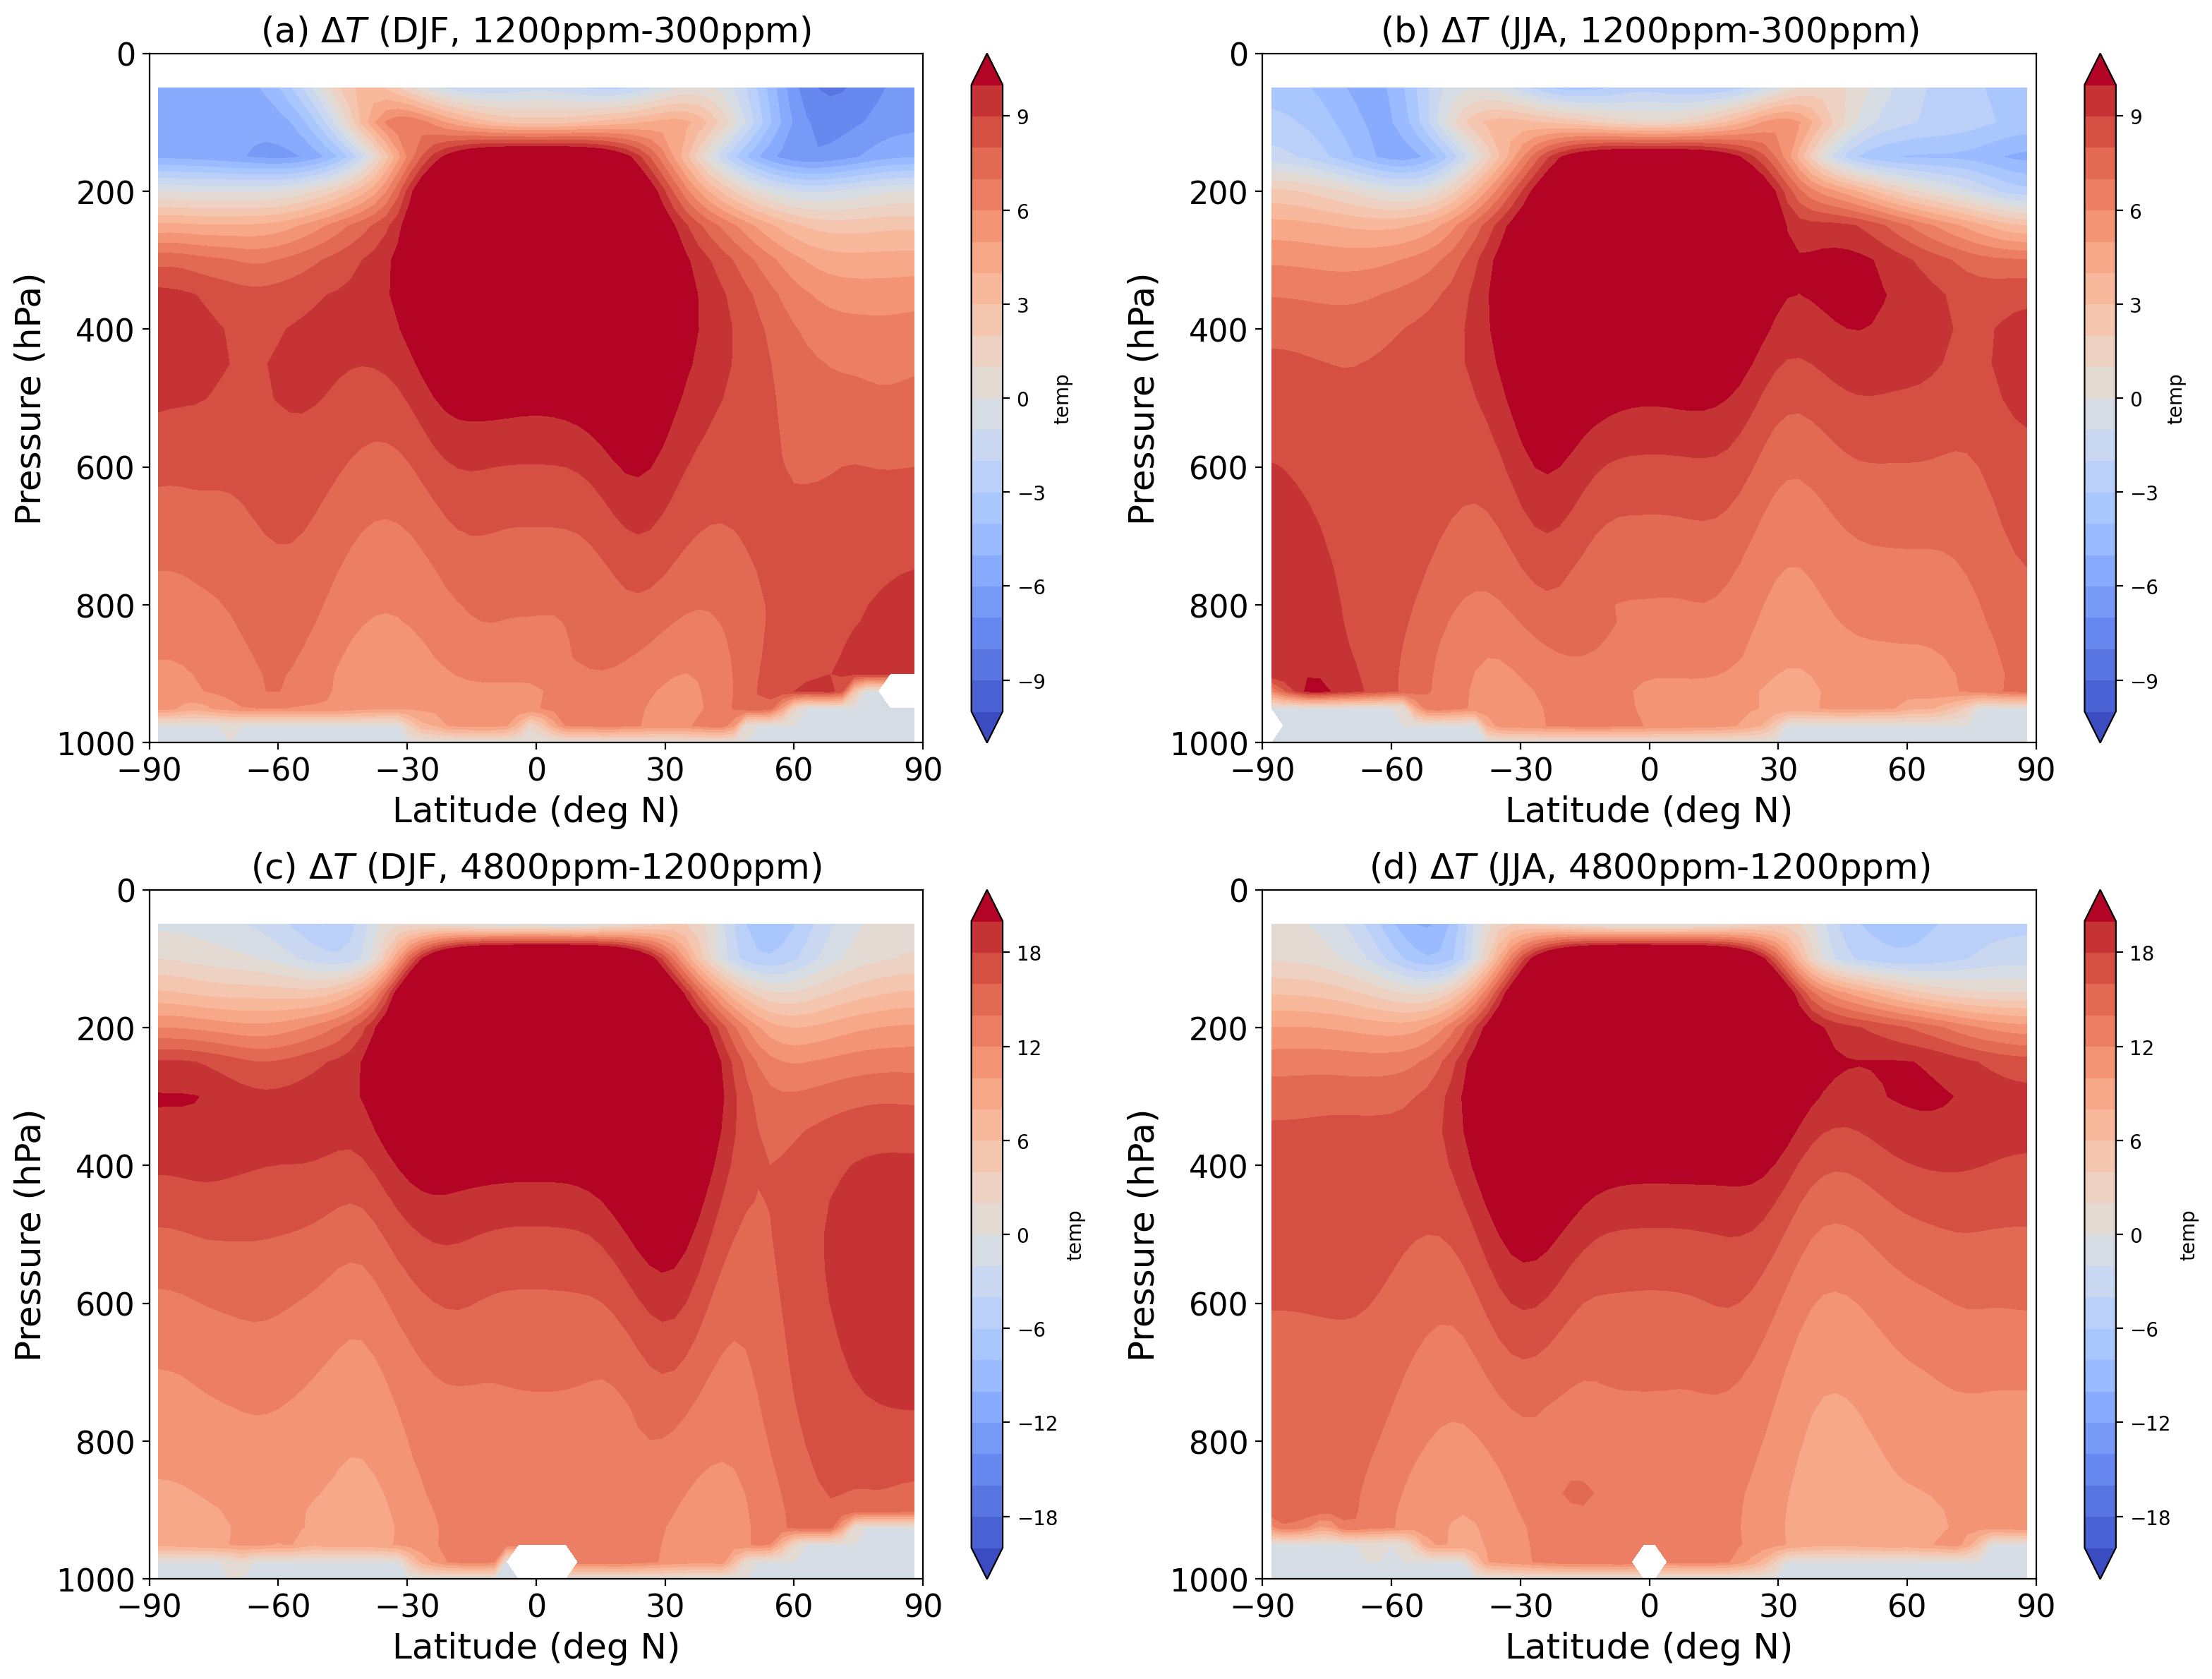

In [301]:
temp_diff_1200 = diff_1200.temp.where(np.abs(diff_1200.temp)<1e10)
temp_diff_4800 = diff_4800.temp.where(np.abs(diff_4800.temp)<1e10)

plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
temp_diff_1200.isel(months=[0,1,2]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-10,10,21),extend='both',cmap='coolwarm')
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) $\Delta T$ (DJF, 1200ppm-300ppm)',fontsize=18)

plt.subplot(222)
temp_diff_1200.isel(months=[6,7,8]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-10,10,21),extend='both',cmap='coolwarm')
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) $\Delta T$ (JJA, 1200ppm-300ppm)',fontsize=18)

plt.subplot(223)
temp_diff_4800.isel(months=[0,1,2]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-20,20,21),extend='both',cmap='coolwarm')
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(c) $\Delta T$ (DJF, 4800ppm-1200ppm)',fontsize=18)

plt.subplot(224)
temp_diff_4800.isel(months=[6,7,8]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-20,20,21),extend='both',cmap='coolwarm')
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(d) $\Delta T$ (JJA, 4800ppm-1200ppm)',fontsize=18)

plt.tight_layout()
plt.savefig('fig4.eps')
plt.show()

In [11]:
# Get CMIP6 plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


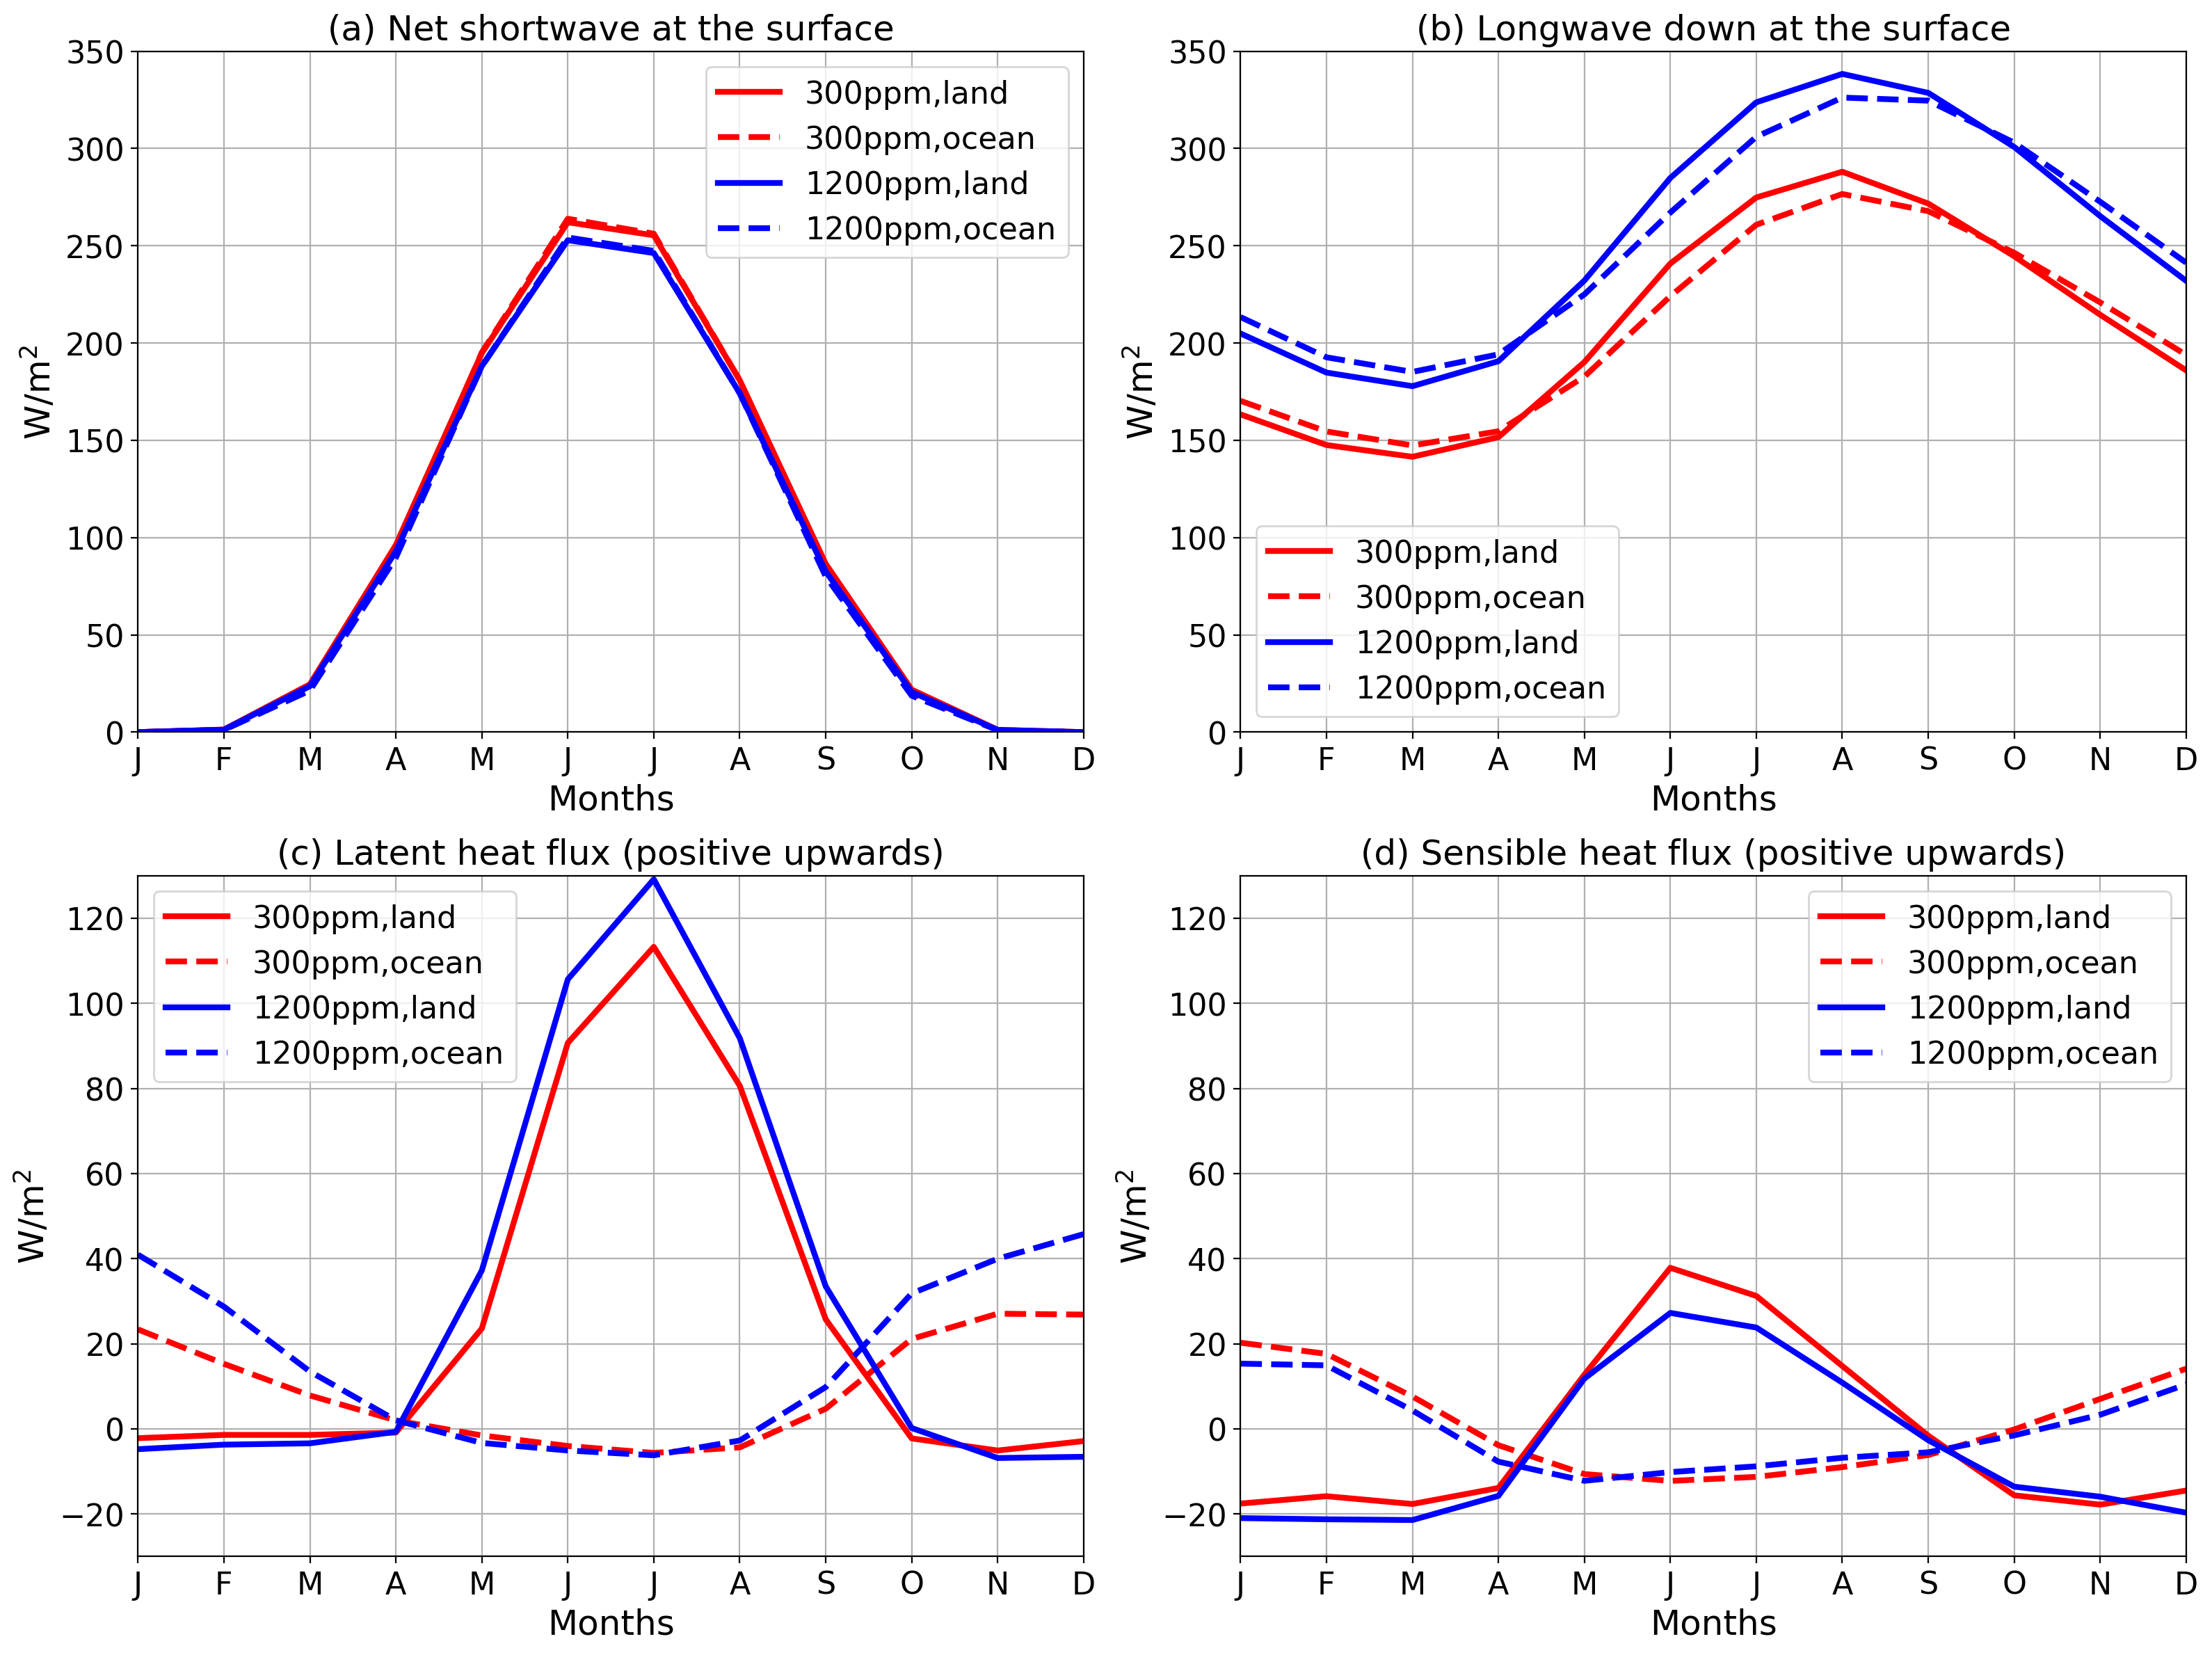

In [12]:
plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
ctl_300.soc_surf_flux_sw.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='300ppm,land')
ctl_300.soc_surf_flux_sw.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='300ppm,ocean')
ctl_1200.soc_surf_flux_sw.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='1200ppm,land')
ctl_1200.soc_surf_flux_sw.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([0,350])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(a) Net shortwave at the surface',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(222)
ctl_300.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='300ppm,land')
ctl_300.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='300ppm,ocean')
ctl_1200.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='1200ppm,land')
ctl_1200.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([0,350])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(b) Longwave down at the surface',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(223)
ctl_300.flux_lhe.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='300ppm,land')
ctl_300.flux_lhe.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='300ppm,ocean')
ctl_1200.flux_lhe.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='1200ppm,land')
ctl_1200.flux_lhe.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([-30,130])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(c) Latent heat flux (positive upwards)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(224)
ctl_300.flux_t.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='300ppm,land')
ctl_300.flux_t.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='300ppm,ocean')
ctl_1200.flux_t.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='1200ppm,land')
ctl_1200.flux_t.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([-30,130])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(d) Sensible heat flux (positive upwards)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('fig6.eps')
plt.show()

In [13]:
# Figure 7

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


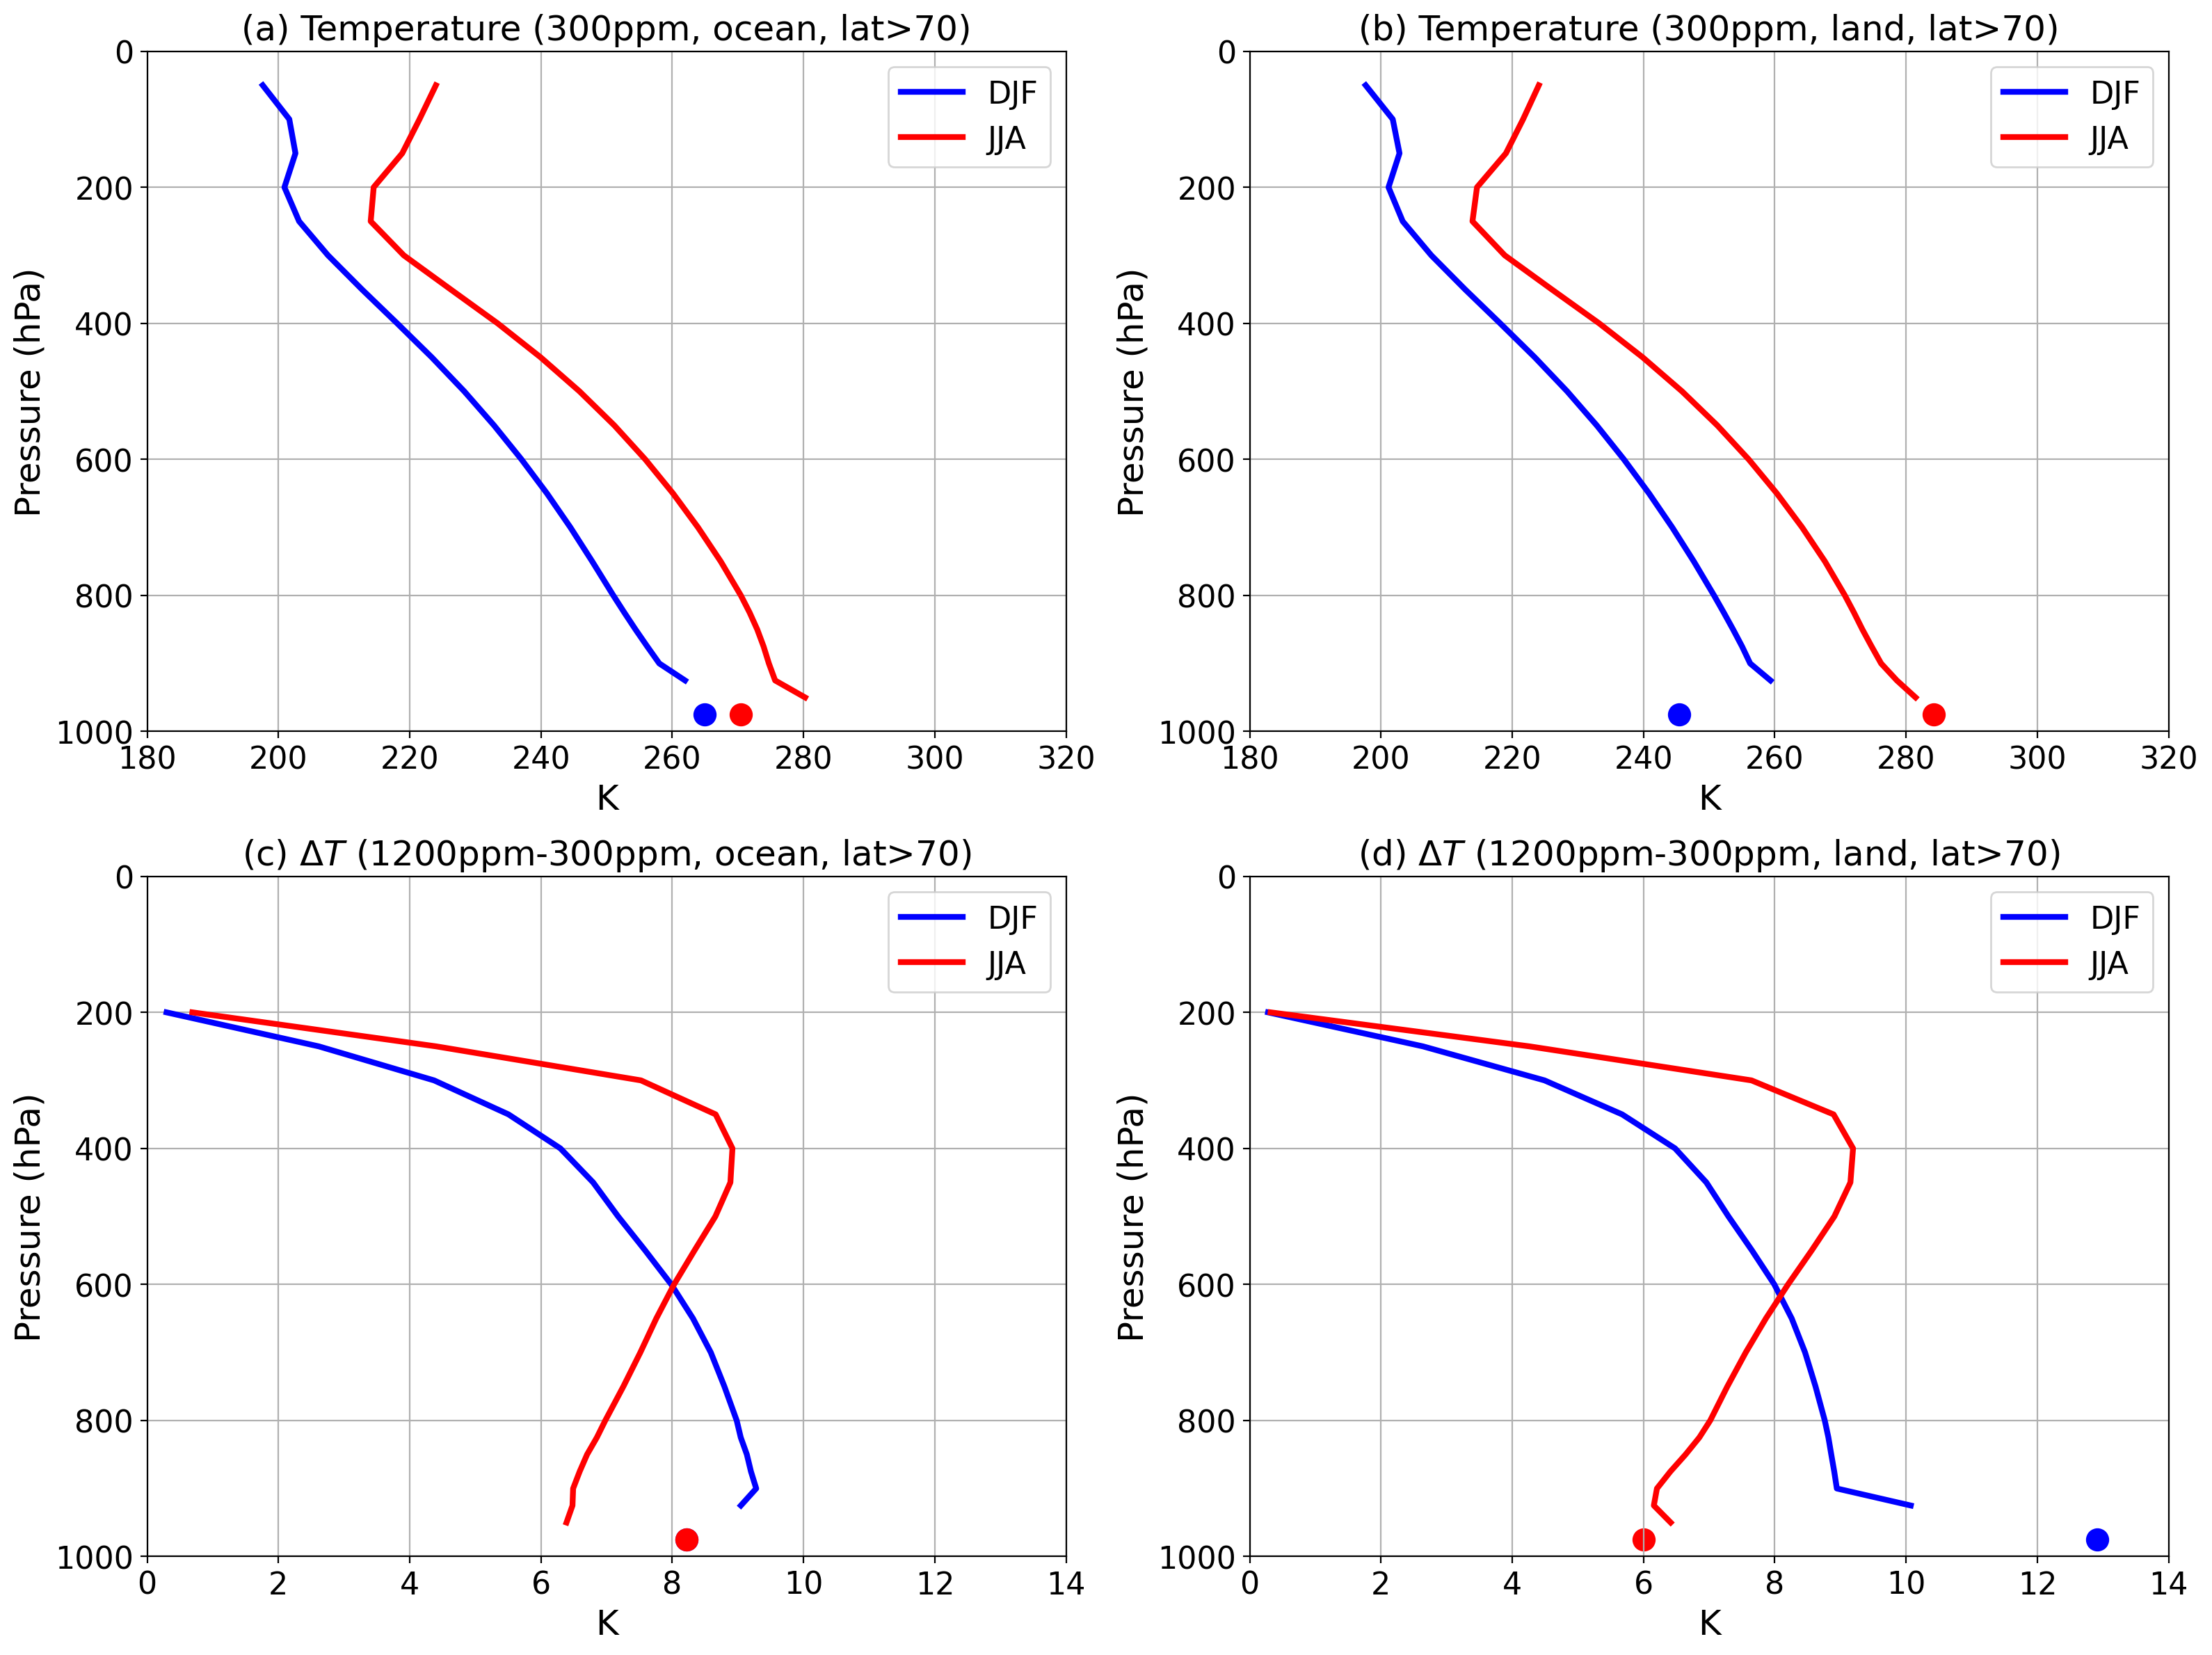

In [14]:
temp_300 = ctl_300.temp.where(np.abs(ctl_300.temp)<1e10)

plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
temp_300.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='DJF')
temp_300.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='JJA')
plt.scatter(ctl_300.t_surf.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',lw=6)
plt.scatter(ctl_300.t_surf.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',lw=6)
plt.xlim([180,320])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) Temperature (300ppm, ocean, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(222)
temp_300.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='DJF')
temp_300.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='JJA')
plt.scatter(ctl_300.t_surf.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',lw=6)
plt.scatter(ctl_300.t_surf.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',lw=6)
plt.xlim([180,320])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) Temperature (300ppm, land, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(223)
temp_diff_1200.where(temp_diff_1200>0).isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='DJF')
temp_diff_1200.where(temp_diff_1200>0).isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='JJA')
plt.scatter(diff_1200.t_surf.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',lw=6)
plt.scatter(diff_1200.t_surf.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',lw=6)
plt.xlim([180,320])
plt.xlim([0,14])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(c) $\Delta T$ (1200ppm-300ppm, ocean, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(224)
temp_diff_1200.where(temp_diff_1200>0).isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='DJF')
temp_diff_1200.where(temp_diff_1200>0).isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='JJA')
plt.scatter(diff_1200.t_surf.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',lw=6)
plt.scatter(diff_1200.t_surf.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',lw=6)
plt.xlim([0,14])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(d) $\Delta T$ (1200ppm-300ppm, land, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('fig8.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


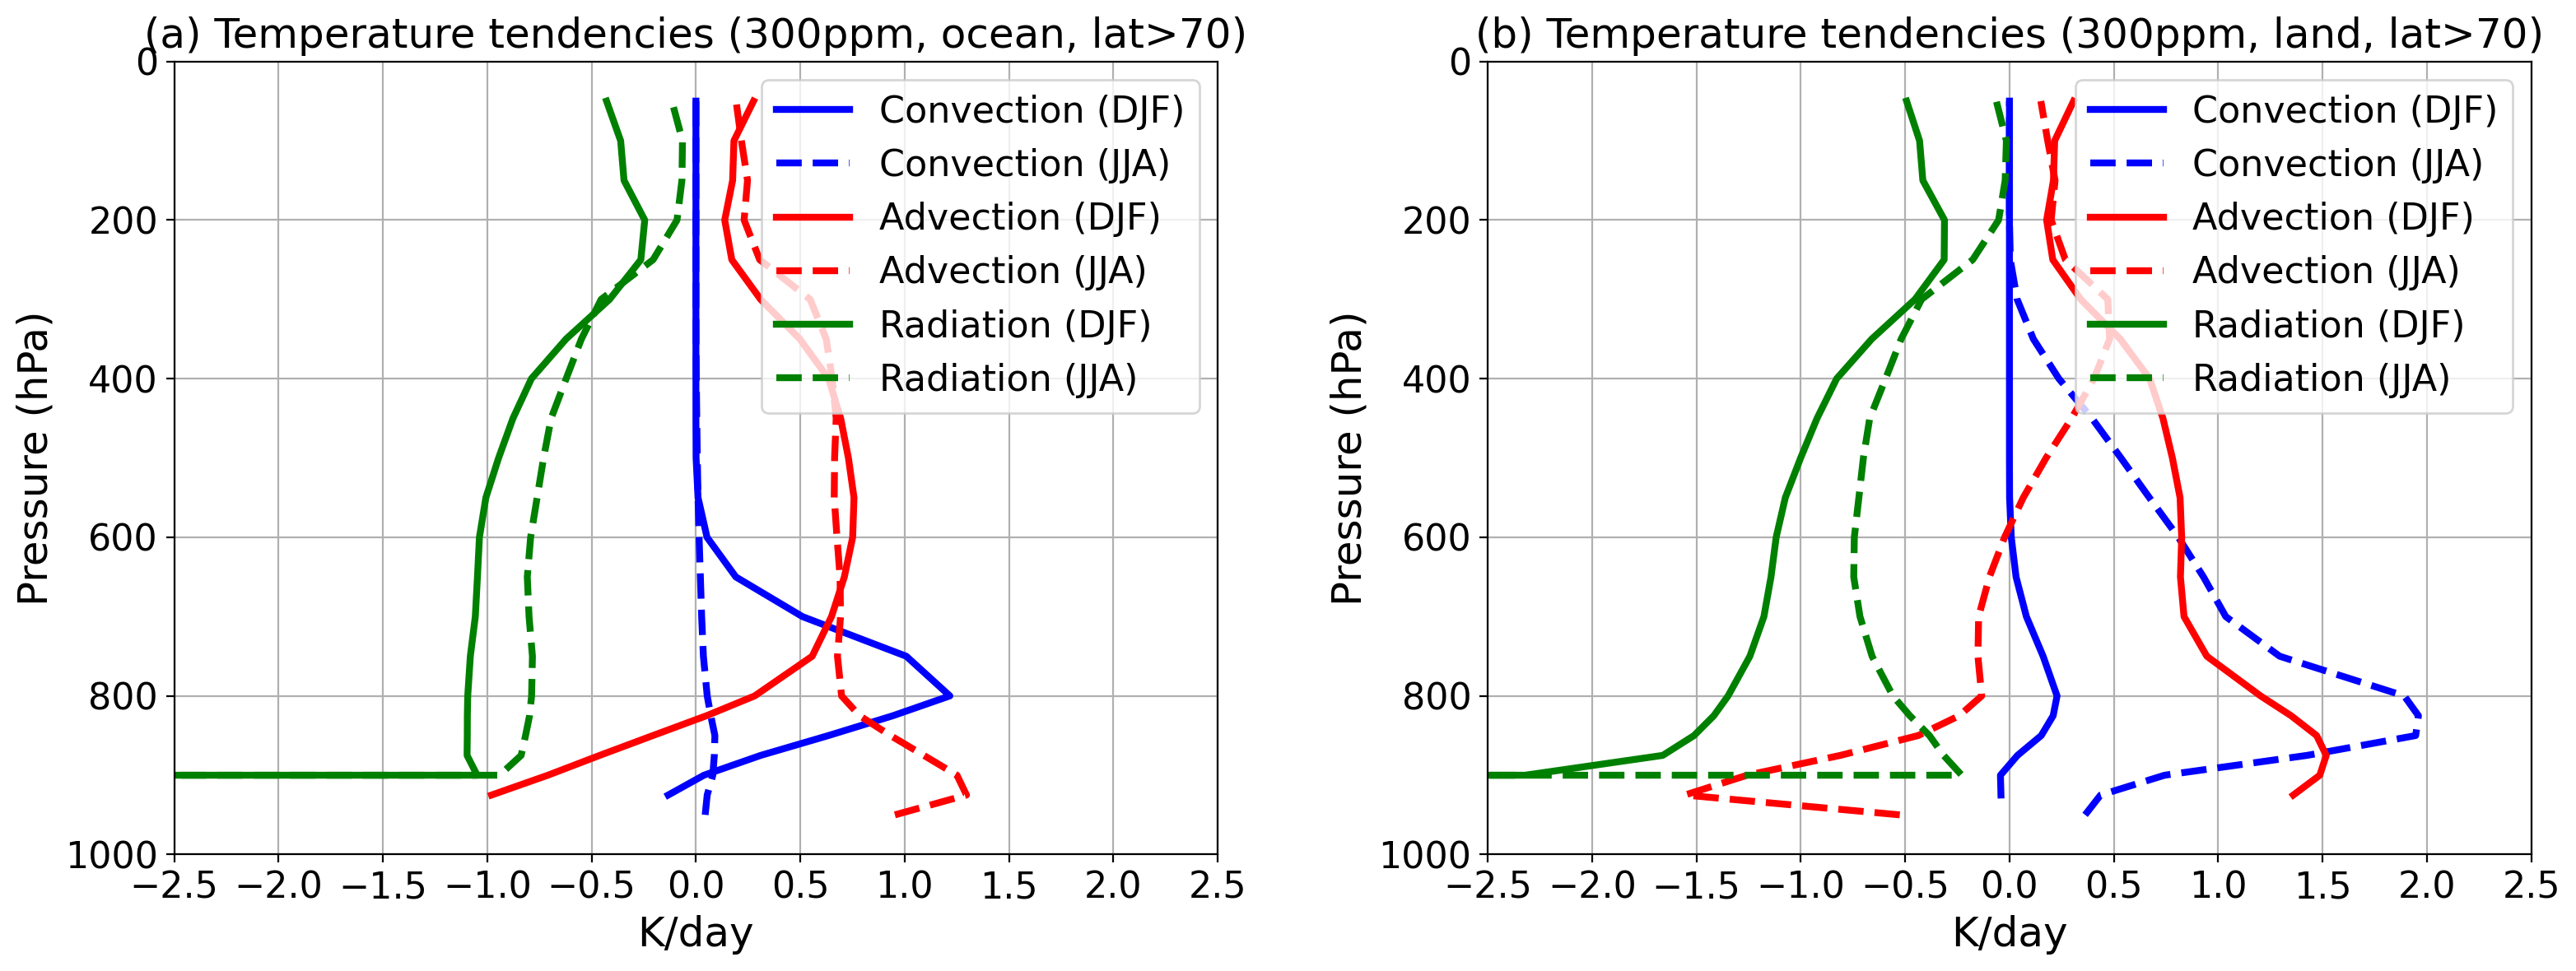

In [15]:
adv_300 = ctl_300.dt_tg_advection.where(np.abs(ctl_300.temp)<1e10)*3600*24
conv_300 = ctl_300.dt_tg_convection.where(np.abs(ctl_300.temp)<1e10)*3600*24
rad_300 = ctl_300.soc_tdt_rad.where(np.abs(ctl_300.soc_tdt_rad)<1e10)*3600*24

plt.figure(figsize=(16, 6),dpi=200)
plt.subplot(121)
conv_300.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='Convection (DJF)')
conv_300.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',ls='--',lw=3,label='Convection (JJA)')
adv_300.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='Advection (DJF)')
adv_300.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',ls='--',lw=3,label='Advection (JJA)')
rad_300.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',lw=3,label='Radiation (DJF)')
rad_300.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',ls='--',lw=3,label='Radiation (JJA)')
plt.xlim([-2.5,2.5])
plt.ylim([1000,0])
plt.xticks(np.linspace(-2.5,2.5,11),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K/day',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) Temperature tendencies (300ppm, ocean, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(122)
conv_300.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='Convection (DJF)')
conv_300.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',ls='--',lw=3,label='Convection (JJA)')
adv_300.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='Advection (DJF)')
adv_300.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',ls='--',lw=3,label='Advection (JJA)')
rad_300.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',lw=3,label='Radiation (DJF)')
rad_300.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',ls='--',lw=3,label='Radiation (JJA)')
plt.xlim([-2.5,2.5])
plt.ylim([1000,0])
plt.xticks(np.linspace(-2.5,2.5,11),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K/day',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) Temperature tendencies (300ppm, land, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('fig9.eps')
plt.show()

In [16]:
ctl_300

<xarray.Dataset>
Dimensions:                (lat: 64, latb: 65, lon: 128, lonb: 129, months: 12, nv: 2, pfull: 24)
Coordinates:
  * lonb                   (lonb) float64 -1.406 1.406 4.219 ... 355.8 358.6
  * nv                     (nv) float64 1.0 2.0
  * latb                   (latb) float64 -90.0 -86.58 -83.76 ... 86.58 90.0
  * lon                    (lon) float64 0.0 2.812 5.625 ... 351.6 354.4 357.2
  * lat                    (lat) float64 -87.86 -85.1 -82.31 ... 85.1 87.86
  * pfull                  (pfull) float32 1000.0 975.0 950.0 ... 100.0 50.0
  * months                 (months) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    height                 (months, pfull, lat, lon) float32 ...
    slp                    (months, lat, lon) float32 ...
    ps                     (months, lat, lon) float32 ...
    zsurf                  (months, lat, lon) float32 ...
    precipitation          (months, lat, lon) float32 ...
    t_surf                 (months, lat, lon) float32 ...
    ml_heat_cap            (months, lat, lon) float32 8257737.0 ... 82577370.0
    albedo                 (months, lat, lon) float32 ...
    flux_oceanq            (months, lat, lon) float32 ...
    flux_t                 (months, lat, lon) float32 ...
    flux_lhe               (months, lat, lon) float32 ...
    sphum                  (months, pfull, lat, lon) float32 ...
    ucomp                  (months, pfull, lat, lon) float32 ...
    vcomp                  (months, pfull, lat, lon) float32 ...
    temp                   (months, pfull, lat, lon) float32 1e+20 ... 207.03006
    vor                    (months, pfull, lat, lon) float32 ...
    div                    (months, pfull, lat, lon) float32 ...
    pres_full              (months, pfull, lat, lon) float32 ...
    dt_tg_advection        (months, pfull, lat, lon) float32 ...
    dt_tg_convection       (months, pfull, lat, lon) float32 ...
    dt_qg_convection       (months, pfull, lat, lon) float32 ...
    dt_tg_condensation     (months, pfull, lat, lon) float32 ...
    dt_qg_condensation     (months, pfull, lat, lon) float32 ...
    dt_tg_diffusion        (months, pfull, lat, lon) float32 ...
    dt_qg_diffusion        (months, pfull, lat, lon) float32 ...
    vcomp_temp             (months, pfull, lat, lon) float32 ...
    vcomp_height           (months, pfull, lat, lon) float32 ...
    sphum_v                (months, pfull, lat, lon) float32 ...
    ucomp_temp             (months, pfull, lat, lon) float32 ...
    ucomp_height           (months, pfull, lat, lon) float32 ...
    sphum_u                (months, pfull, lat, lon) float32 ...
    sphum_w                (months, pfull, lat, lon) float32 ...
    omega                  (months, pfull, lat, lon) float32 ...
    omega_temp             (months, pfull, lat, lon) float32 ...
    omega_height           (months, pfull, lat, lon) float32 ...
    soc_tdt_lw             (months, pfull, lat, lon) float32 ...
    soc_tdt_sw             (months, pfull, lat, lon) float32 ...
    soc_tdt_rad            (months, pfull, lat, lon) float32 -999.0 ... -7.558131e-06
    soc_surf_flux_lw       (months, lat, lon) float32 ...
    soc_surf_flux_sw       (months, lat, lon) float32 ...
    soc_surf_flux_lw_down  (months, lat, lon) float32 ...
    soc_surf_flux_sw_down  (months, lat, lon) float32 ...
    soc_olr                (months, lat, lon) float32 ...
    soc_toa_sw             (months, lat, lon) float32 ...
    soc_toa_sw_down        (months, lat, lon) float32 ...
    time_bounds            (months, nv) float64 ...
    average_T1             (months) float64 ...
    average_T2             (months) float64 ...
    average_DT             (months) float64 ...